**Original LlamaIndex:** https://docs.llamaindex.ai/en/stable/examples/multi_modal/anthropic_multi_modal.html

**Llama-index GitHub Code:** https://github.com/run-llama/llama_index/blob/main/docs/examples/multi_modal/anthropic_multi_modal.ipynb

**LlamaIndex 🦙 v0.10.16:** https://docs.llamaindex.ai/en/stable/examples/multi_modal/gemini.html

#### **Multi-Modal LLM using Anthropic model for image reasoning**

Anthropic has recently released its latest Multi modal models: Claude 3 Opus, Claude 3 Sonnet.

1. Claude 3 Opus - claude-3-opus-20240229

2. Claude 3 Sonnet - claude-3-sonnet-20240229

In this notebook, we show how to use Anthropic MultiModal LLM class/abstraction for image understanding/reasoning.

We also show several functions we are now supporting for Anthropic MultiModal LLM:

1. `complete` (both sync and async): for a single prompt and list of images
2. `chat` (both sync and async): for multiple chat messages
3. `stream complete` (both sync and async): for steaming output of complete
4. `stream chat` (both sync and async): for steaming output of chat


In [ ]:
!pip install -q -U llama-index-multi-modal-llms-anthropic
!pip install -q -U llama-index-vector-stores-qdrant
!pip install -q matplotlib
!pip install -q  -U llama-index-readers-file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.2/848.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.3/206.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import userdata
ANTHROPIC_API_KEY = userdata.get("ANTHROPIC_API_KEY")

#### **Use `Anthropic` to understand Images from Local directory**

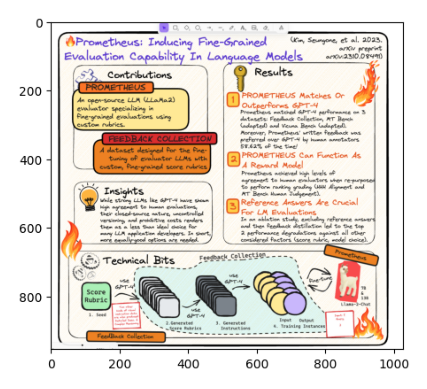

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/ikb.png"
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal

In [ ]:
# put your local directore here
image_documents = SimpleDirectoryReader(input_files = [img_path]).load_data()

In [ ]:
# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(max_tokens = 300,
                                       api_key = ANTHROPIC_API_KEY)

In [ ]:
response = anthropic_mm_llm.complete(prompt = "Describe the images as an alternative text",
                                     image_documents = image_documents)

In [ ]:
print(response)

The image is an infographic titled "A Prometheus: Inducing Fine-Grained Evaluation Capability In Language Models". It illustrates a process flow from top to bottom, with various steps and components.

At the top, there are boxes labeled "Prometheus (PROMETHIUS)" and "Contributions". The Prometheus box lists capabilities like "Perform natural API or performance on arbitrary domains", while the Contributions box highlights "PROMETHIUS Metrics for Quantifying Capability" and other technical aspects.

In the middle section, there are boxes for "Feedback Collection", "Insights" and "Results". The Feedback Collection involves collecting human feedback on model outputs. The Insights discuss analyzing feedback to identify issues. The Results mention a "Rigorous Model" that can evaluate its own outputs.

The bottom section shows "Technical Bits" with icons representing score boards, data, and different model architectures like transformers and LSTMs.

Overall, the infographic breaks down a meth

In [ ]:
from IPython.display import Markdown, display
Markdown(response.text)

The image is an infographic titled "A Prometheus: Inducing Fine-Grained Evaluation Capability In Language Models". It illustrates a process flow from top to bottom, with various steps and components.

At the top, there are boxes labeled "Prometheus (PROMETHIUS)" and "Contributions". The Prometheus box lists capabilities like "Perform natural API or performance on arbitrary domains", while the Contributions box highlights "PROMETHIUS Metrics for Quantifying Capability" and other technical aspects.

In the middle section, there are boxes for "Feedback Collection", "Insights" and "Results". The Feedback Collection involves collecting human feedback on model outputs. The Insights discuss analyzing feedback to identify issues. The Results mention a "Rigorous Model" that can evaluate its own outputs.

The bottom section shows "Technical Bits" with icons representing score boards, data, and different model architectures like transformers and LSTMs.

Overall, the infographic breaks down a methodology called Prometheus for enabling language models to evaluate their own outputs, using techniques like collecting human feedback, analyzing it for insights, and incorporating that into a rigorous evaluation model.

#### **Use `AnthropicMultiModal` to reason images from URLs**

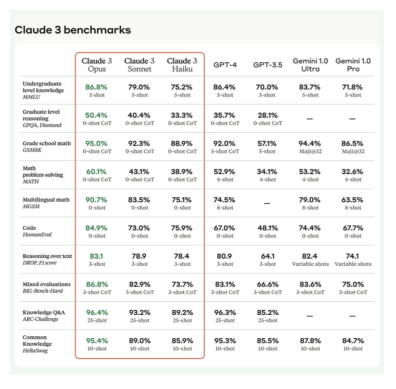

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

image_urls = ["https://venturebeat.com/wp-content/uploads/2024/03/Screenshot-2024-03-04-at-12.49.41%E2%80%AFAM.png",
             # Add yours here!
             ]

img_response = requests.get(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)
plt.axis("off")
plt.show()

image_url_documents = load_image_urls(image_urls)

In [ ]:
response = anthropic_mm_llm.complete(prompt = "Describe the images as an alternative text",
                                     image_documents = image_url_documents)

In [ ]:
print(response)

The image shows a table comparing the benchmark scores of various Claude 3 AI models (Opus, Sonnet, Haiku) against GPT-4, GPT-3.5, and two versions of Gemini (1.0 Ultra and 1.0 Pro) across different academic subjects and tests.

The subjects covered include undergraduate and graduate level knowledge, grade school math, math problem-solving, multilingual math, code, reasoning over text, mixed evaluations, knowledge Q&A, and common knowledge.

The scores are presented as percentages, except for the "Reasoning over text" row which shows raw scores out of a certain number of shots.

Overall, the Claude 3 models show competitive performance compared to the GPT and Gemini models across most of the benchmarks. The Gemini models have a slight edge in some categories.


In [ ]:
Markdown(response.text)

The image shows a table comparing the benchmark scores of various Claude 3 AI models (Opus, Sonnet, Haiku) against GPT-4, GPT-3.5, and two versions of Gemini (1.0 Ultra and 1.0 Pro) across different academic subjects and tests.

The subjects covered include undergraduate and graduate level knowledge, grade school math, math problem-solving, multilingual math, code, reasoning over text, mixed evaluations, knowledge Q&A, and common knowledge.

The scores are presented as percentages, except for the "Reasoning over text" row which shows raw scores out of a certain number of shots.

Overall, the Claude 3 models show competitive performance compared to the GPT and Gemini models across most of the benchmarks. The Gemini models have a slight edge in some categories.

#### **Structured Output Parsing from an Image**

In this section, we use our multi-modal Pydantic program to generate structured output from an image.

In [ ]:
from llama_index.core import SimpleDirectoryReader

In [ ]:
# put your local directore here
image_documents = SimpleDirectoryReader(input_files = [img_path]).load_data()

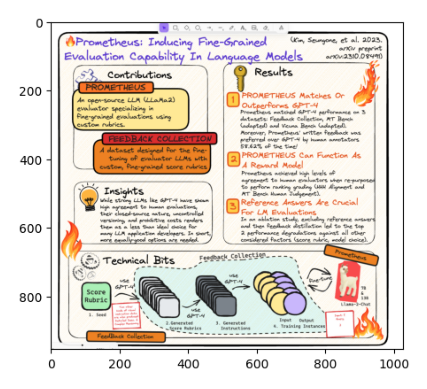

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from pydantic import BaseModel
from typing import List


class TickerInfo(BaseModel):
    """List of ticker info."""

    direction: str
    ticker: str
    company: str
    shares_traded: int
    percent_of_total_etf: float


class TickerList(BaseModel):
    """List of stock tickers."""

    fund: str
    tickers: List[TickerInfo]

In [ ]:
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

In [ ]:
prompt_template_str = """\
Can you get the stock information in the image \
and return the answer? Pick just one fund.

Make sure the answer is a JSON format corresponding to a Pydantic schema. The Pydantic schema is given below.

"""

# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(max_tokens = 300,
                                       api_key = ANTHROPIC_API_KEY)


llm_program = MultiModalLLMCompletionProgram.from_defaults(output_cls = TickerList,
                                                           image_documents = image_documents,
                                                           prompt_template_str = prompt_template_str,
                                                           multi_modal_llm = anthropic_mm_llm,
                                                           verbose = True)

In [ ]:
response = llm_program()

> Raw output: Here is the stock information for one fund extracted from the image in JSON format matching the provided schema:

{
  "fund": "Technical Bits",
  "tickers": [
    {
      "direction": "up",
      "ticker": "AAPL",
      "company": "Apple",
      "shares_traded": 1000,
      "percent_of_total_etf": 0.25
    },
    {
      "direction": "up",  
      "ticker": "GOOG",
      "company": "Google",
      "shares_traded": 500,
      "percent_of_total_etf": 0.2
    },
    {
      "direction": "down",
      "ticker": "MSFT", 
      "company": "Microsoft",
      "shares_traded": 800,
      "percent_of_total_etf": 0.2
    },
    {
      "direction": "up",
      "ticker": "AMZN",
      "company": "Amazon",
      "shares_traded": 200,
      "percent_of_total_etf": 0.15
    }
  ]
}


In [ ]:
print(str(response))

fund='Technical Bits' tickers=[TickerInfo(direction='up', ticker='AAPL', company='Apple', shares_traded=1000, percent_of_total_etf=0.25), TickerInfo(direction='up', ticker='GOOG', company='Google', shares_traded=500, percent_of_total_etf=0.2), TickerInfo(direction='down', ticker='MSFT', company='Microsoft', shares_traded=800, percent_of_total_etf=0.2), TickerInfo(direction='up', ticker='AMZN', company='Amazon', shares_traded=200, percent_of_total_etf=0.15)]


                                                  -: END :-